# 机器学习 练习2 - 逻辑回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
positive = data[data.Admitted.isin([1])]
negtive = data[data.Admitted.isin([0])]

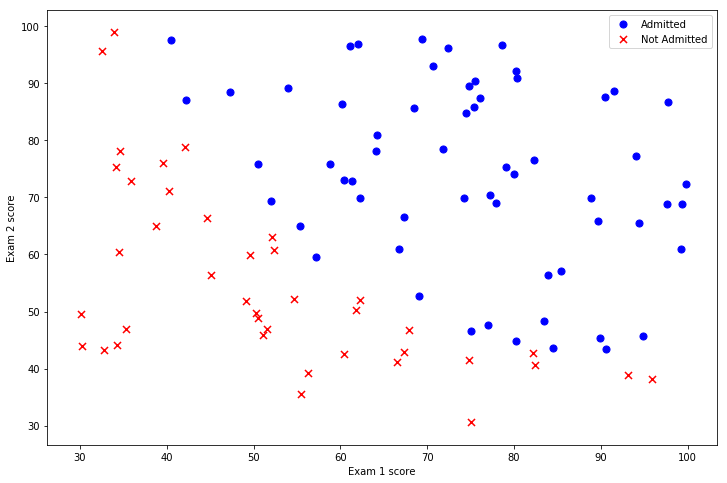

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive.Exam1, positive.Exam2, s=50, c='b', marker='o', label='Admitted')
ax.scatter(negtive.Exam1, negtive.Exam2, s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

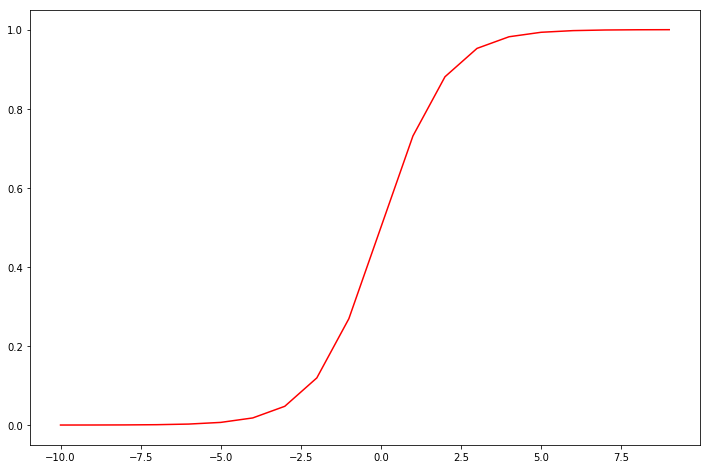

In [6]:
nums = np.arange(-10, 10, 1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.show()

In [7]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]

X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1:cols]

In [8]:
X = np.array(X)
y = np.array(y)
theta = np.zeros(3)

In [9]:
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [10]:
def cost(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second =np.multiply((1-y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / X.shape[0]

In [11]:
cost(theta, X, y)

0.6931471805599453

## 梯度下降

In [12]:
def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    paras = theta.shape[1]
    grad = np.zeros(paras)
    err = sigmoid(X * theta.T) - y

    for i in range(paras):
        term = np.multiply(err, X[:,i])
        grad[i] = np.sum(term)/X.shape[0]
    return grad

In [13]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [14]:
import scipy.optimize as opt

In [15]:
help(opt.fmin_tnc)

Help on function fmin_tnc in module scipy.optimize.tnc:

fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)
    Minimize a function with variables subject to bounds, using
    gradient information in a truncated Newton algorithm. This
    method wraps a C implementation of the algorithm.
    
    Parameters
    ----------
    func : callable ``func(x, *args)``
        Function to minimize.  Must do one of:
    
        1. Return f and g, where f is the value of the function and g its
           gradient (a list of floats).
    
        2. Return the function value but supply gradient function
           separately as `fprime`.
    
        3. Return the function value and set ``approx_grad=True``.
    
        If the function returns None, the minimization
        is aborted.
    x0 : arra

In [16]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)

In [17]:
cost(result[0], X, y)

0.20349770158947458

In [18]:
def predict(X, theta):
    prob = sigmoid(X * theta.T)
    return [1 if x>=0.5 else 0 for x in prob]

In [19]:
theta_min = np.matrix(result[0])
predictions = predict(X, theta_min)
correct = [1 if a==b else 0 for a,b in zip(predictions, y)]

In [20]:
acc = sum(correct) / len(correct)
print ('accuracy = {0}%'.format(acc*100))

accuracy = 89.0%


## 正则化逻辑回归

In [21]:
path = 'ex2data2.txt'
data = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
data.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [22]:
data.describe()

,Test1,Test2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


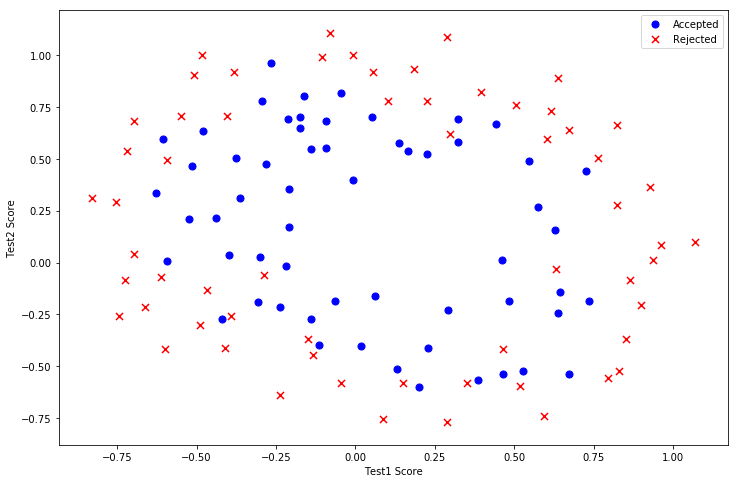

In [23]:
positive = data[data.Accepted.isin([1])]
negative = data[data.Accepted.isin([0])]

fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(positive.Test1, positive.Test2, s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative.Test1, negative.Test2, s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1 Score')
ax.set_ylabel('Test2 Score')
plt.show()

## 构造多项式特征

In [24]:
x1 = data.Test1
x2 = data.Test2
data.insert(3, 'Ones', 1)

In [25]:
data.head()

,Test1,Test2,Accepted,Ones
0,0.051267,0.69956,1,1
1,-0.092742,0.68494,1,1
2,-0.213710,0.69225,1,1
3,-0.375000,0.50219,1,1
4,-0.513250,0.46564,1,1


In [26]:
degree = 5
for i in range(1, degree):
    for j in range(i):
        data['F'+str(i)+str(j)] = np.power(x1, i-j) * np.power(x2, j)

data.head()

,Test1,Test2,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,0.051267,0.69956,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,-0.092742,0.68494,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,-0.213710,0.69225,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,-0.375000,0.50219,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,-0.513250,0.46564,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [27]:
data.drop('Test1', axis=1, inplace=True)
data.drop('Test2', axis=1, inplace=True)

In [28]:
data.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


## 正则化代价函数

In [29]:
def cost_reg(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1-y), np.log(1 - sigmoid(X * theta.T)))
    reg = lr / (2 * X.shape[0]) * np.sum(np.power(theta[0, 1:theta.shape[1]],2))
    return np.sum(first - second) / X.shape[0] + reg

In [30]:
def gradient_reg(theta, X, y, lr):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    paras = theta.shape[1]
    grad = np.zeros(paras)

    err = sigmoid(X * theta.T) - y

    for i in range(paras):
        term = np.multiply(err, X[:, i])
        if i==0:
            grad[i] = np.sum(term) / X.shape[0]
        else:
            grad[i] = np.sum(term) / X.shape[0] + lr * theta[0,i] / X.shape[0]
    
    return grad

In [31]:
cols = data.shape[1]
X = data.iloc[:, 1:cols]
y = data.iloc[:, 0:1]

X = np.array(X)
y = np.array(y)
theta = np.zeros(11)

In [32]:
lr = 0.01

In [33]:
cost_reg(theta, X, y, lr)

0.6931471805599454

In [34]:
gradient_reg(theta, X, y, lr)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [35]:
result = opt.fmin_tnc(func=cost_reg, x0=theta, fprime=gradient_reg, args=(X,y,lr))
result

(array([  0.68192372,   0.07473453,   5.09873935,  -5.44798423,
          4.52327469,   5.00668422,  -0.64642766, -14.96272418,
          0.98393231, -18.3170637 ,   4.53368975]), 70, 1)

In [36]:
theta_min = np.matrix(result[0])
predictions = predict(X, theta_min)
correct = [1 if a==b else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) / len(correct)
print ('accuracy = {0}%'.format(accuracy*100))

accuracy = 74.57627118644068%


## sklearn library

In [37]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=100)

In [38]:
model.fit(X, y)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39]:
model.score(X, y)

0.7457627118644068